In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best2.csv")
df = df.drop_duplicates()
print(df.head())

       KLHL21   MIR663AHG  Results
0  408.378949  956.023865        1
1  253.319773  652.490325        1
2  532.444640  230.137969        1
3  391.074568  454.849806        1
4  399.819591   64.775241        1


In [3]:
# def map_results(inpt):
#     if inpt == 'control':
#         return 0;

#     else:
#         return 1;

In [4]:
# df['Results'] = df['Results'].apply(map_results)
# print(df.head())

In [5]:

df.describe()

,KLHL21,MIR663AHG,Results
count,116.000000,116.000000,116.000000
mean,341.190567,681.840503,0.431034
std,132.385307,1065.674828,0.497369
min,66.370880,8.483496,0.000000
25%,262.744890,83.343558,0.000000
50%,315.817003,300.196621,0.000000
75%,393.077684,770.164663,1.000000
max,1136.361050,7208.064725,1.000000


In [6]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['KLHL21', 'MIR663AHG', 'Results']
3


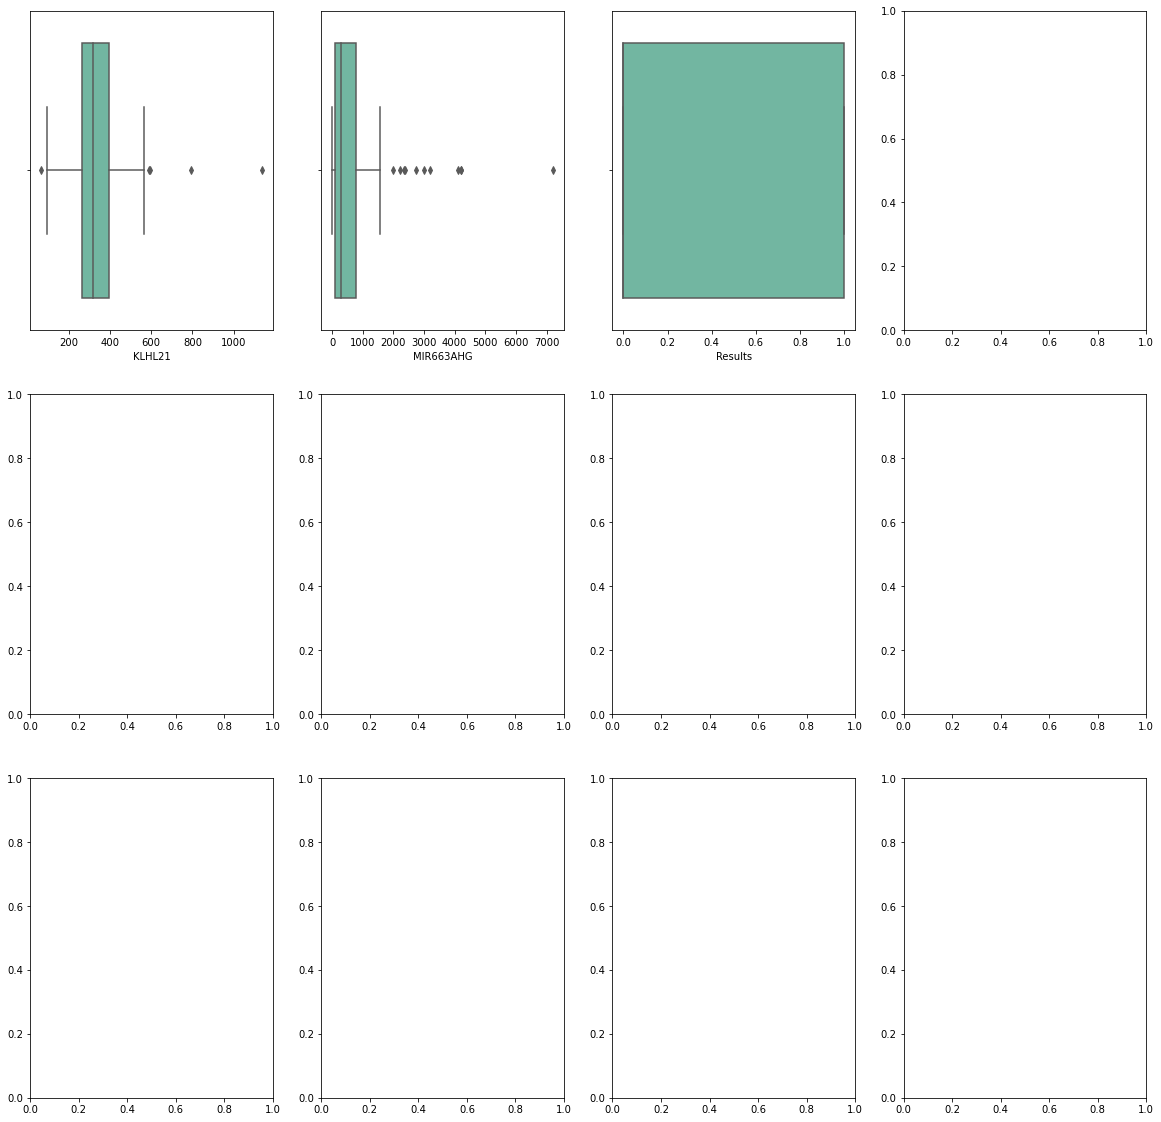

In [7]:
fig, axes = plt.subplots(3,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    
    else:
        y_ += 1

In [8]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['KLHL21', 'MIR663AHG', 'Results'], dtype='object')
     KLHL21  MIR663AHG  Results
0  0.319637   0.131610      1.0
1  0.174720   0.089451      1.0
2  0.435587   0.030787      1.0
3  0.303464   0.061999      1.0
4  0.311637   0.007819      1.0


In [9]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

0    66
1    50
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

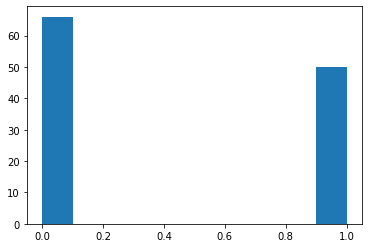

In [10]:
plt.hist(y)

1    66
0    66
Name: Results, dtype: int64


(array([66.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 66.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

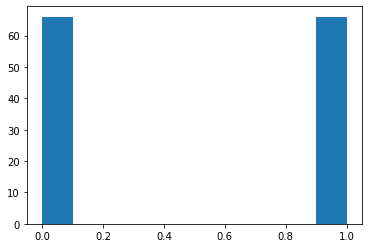

In [11]:
smt = SMOTE()
X, Y = smt.fit_resample(x,y)
print(Y.value_counts())
plt.hist(Y)

In [19]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  71.212
Standed deviation :  4.545
CV value :  3
Parameters :  {}
Accuracy :  74.242
Standed deviation :  4.670
CV value :  4
Parameters :  {}
Accuracy :  78.030
Standed deviation :  9.432
CV value :  5
Parameters :  {}
Accuracy :  78.803
Standed deviation :  7.479


In [13]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 10}
Accuracy :  78.788
Standed deviation :  1.515
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  78.030
Standed deviation :  7.025
CV value :  4
Parameters :  {'random_state': 5}
Accuracy :  79.545
Standed deviation :  5.410
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  78.746
Standed deviation :  5.353


In [14]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 7}
Accuracy :  73.485
Standed deviation :  0.758
CV value :  3
Parameters :  {'n_neighbors': 7}
Accuracy :  77.273
Standed deviation :  3.214
CV value :  4
Parameters :  {'n_neighbors': 7}
Accuracy :  80.303
Standed deviation :  4.545
CV value :  5
Parameters :  {'n_neighbors': 7}
Accuracy :  78.889
Standed deviation :  8.575


In [15]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  50.000
Standed deviation :  10.606
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  53.788
Standed deviation :  5.669
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  53.788
Standed deviation :  3.302
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  54.587
Standed deviation :  9.476


In [16]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  44.697
Standed deviation :  6.818
CV value :  3
Parameters :  {}
Accuracy :  40.152
Standed deviation :  3.863
CV value :  4
Parameters :  {}
Accuracy :  47.727
Standed deviation :  1.312
CV value :  5
Parameters :  {}
Accuracy :  46.980
Standed deviation :  5.144


In [17]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'rbf'}
Accuracy :  70.455
Standed deviation :  2.273
CV value :  3
Parameters :  {'kernel': 'rbf'}
Accuracy :  73.485
Standed deviation :  5.965
CV value :  4
Parameters :  {'kernel': 'rbf'}
Accuracy :  76.515
Standed deviation :  4.968
CV value :  5
Parameters :  {'kernel': 'rbf'}
Accuracy :  75.783
Standed deviation :  3.654


In [18]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 300}
Accuracy :  76.515
Standed deviation :  5.303
CV value :  3
Parameters :  {'max_depth': 150, 'max_features': 2, 'n_estimators': 100}
Accuracy :  81.061
Standed deviation :  2.835
CV value :  4
Parameters :  {'max_depth': 90, 'max_features': 5, 'n_estimators': 100}
Accuracy :  81.818
Standed deviation :  5.669
CV value :  5
Parameters :  {'max_depth': 80, 'max_features': 4, 'n_estimators': 300}
Accuracy :  81.054
Standed deviation :  2.457
